In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('Solarize_Light2')

In [2]:
df=pd.read_csv('probe.csv')
df.head()

,t,x,y,z,prank,etype,uidx,eidx,rho,u,v,w,p
0,3.211295e-07,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,4.279629e-11,-9.923974e-13,89769.0
1,8.815134e-07,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,4.869202e-11,-1.122913e-11,89769.0
2,1.647040e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,5.807815e-11,-2.223040e-11,89769.0
3,2.668280e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,6.084827e-11,-3.707606e-11,89769.0
4,4.028759e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,6.188746e-11,-5.721957e-11,89769.0


array([0.12967654])

In [3]:
df.dtypes

t        float64
x        float64
y        float64
z        float64
prank      int64
etype     object
uidx       int64
eidx       int64
rho      float64
u        float64
v        float64
w        float64
p        float64
dtype: object

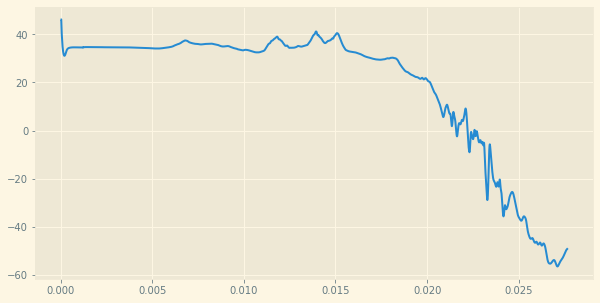

In [4]:
plt.figure(figsize=(10,5))
plt.plot(df.t,df.u)

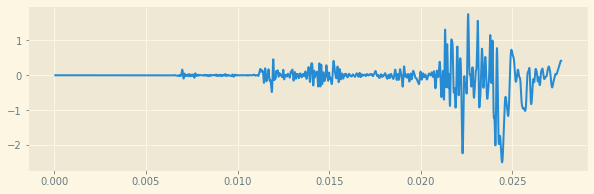

In [5]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.v)

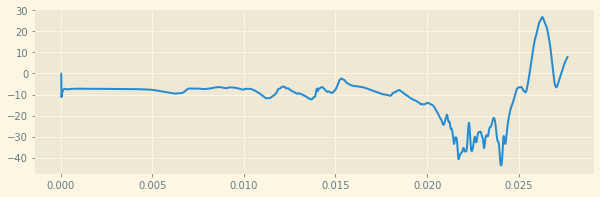

In [6]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.w)

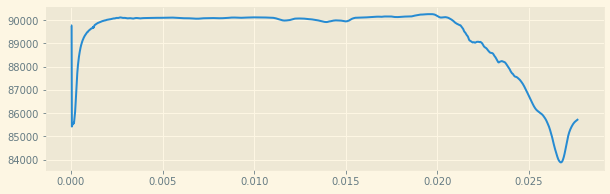

In [7]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.p)

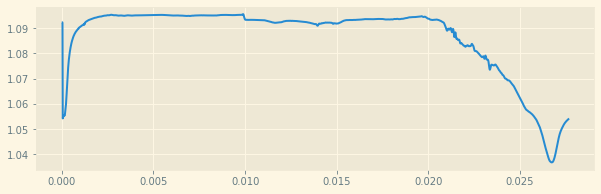

In [8]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.rho)

In [9]:
df.shape

(3802, 13)

## Univariate prediction

In [10]:
# take 10 time steps and try to predict the 11th time step output
def df_to_x_y(df,window_size=10):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        inpt = [[u] for u in df_as_np[i:i+window_size]]
        X.append(inpt)
        outpt = df_as_np[i+window_size]
        y.append(outpt)
    return np.array(X),np.array(y)

In [11]:
ws=10
Uin,Uout = df_to_x_y(df['u'],ws)

In [134]:
Uin.shape

(3792, 10, 1)

1,2,3,4,5...10  11
2,3,...11       12
3,4....12       13
10,11,....20.   21
1,.....,100 101 102 103 .....

In [132]:
Uin[10],Uout[10]

(array([[46.22686327],
        [46.19353651],
        [44.22941752],
        [42.20877101],
        [41.15859806],
        [40.10033628],
        [39.13289225],
        [38.12907611],
        [37.20329384],
        [36.37535878]]),
 35.58551937106901)

In [133]:
Uin[11],Uout[11]

(array([[46.19353651],
        [44.22941752],
        [42.20877101],
        [41.15859806],
        [40.10033628],
        [39.13289225],
        [38.12907611],
        [37.20329384],
        [36.37535878],
        [35.58551937]]),
 34.88014174971883)

In [12]:
x_train,y_train = Uin[:3000],Uout[:3000]
x_val,y_val = Uin[3000:3350],Uout[3000:3350]
x_test,y_test = Uin[3350:],Uout[3350:]

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [14]:
model = Sequential()
model.add(InputLayer((ws,1)))
model.add(LSTM(64))
model.add(Dense(16,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 17,953
Trainable params: 17,953
Non-trainable params: 0
_________________________________________________________________


In [15]:
cp = ModelCheckpoint('model1/',save_best_only=True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [16]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[cp])

Epoch 1/50
83/94 [=========================>....] - ETA: 0s - loss: 1057.0072 - root_mean_squared_error: 32.5116

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 5s 40ms/step - loss: 1051.6340 - root_mean_squared_error: 32.4289 - val_loss: 316.5856 - val_root_mean_squared_error: 17.7929
Epoch 2/50
93/94 [============================>.] - ETA: 0s - loss: 1011.0426 - root_mean_squared_error: 31.7969

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 1011.4482 - root_mean_squared_error: 31.8033 - val_loss: 314.4255 - val_root_mean_squared_error: 17.7320
Epoch 3/50
89/94 [===========================>..] - ETA: 0s - loss: 916.0972 - root_mean_squared_error: 30.2671

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 911.3203 - root_mean_squared_error: 30.1881 - val_loss: 313.6136 - val_root_mean_squared_error: 17.7091
Epoch 4/50
89/94 [===========================>..] - ETA: 0s - loss: 739.5753 - root_mean_squared_error: 27.1951

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 735.1353 - root_mean_squared_error: 27.1134 - val_loss: 312.9454 - val_root_mean_squared_error: 17.6903
Epoch 5/50
94/94 [==============================] - 0s 4ms/step - loss: 554.5220 - root_mean_squared_error: 23.5483 - val_loss: 314.5518 - val_root_mean_squared_error: 17.7356
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 411.2314 - root_mean_squared_error: 20.2788 - val_loss: 315.5565 - val_root_mean_squared_error: 17.7639
Epoch 7/50
94/94 [==============================] - 0s 4ms/step - loss: 319.2344 - root_mean_squared_error: 17.8671 - val_loss: 314.9206 - val_root_mean_squared_error: 17.7460
Epoch 8/50
94/94 [==============================] - 0s 4ms/step - loss: 251.2545 - root_mean_squared_error: 15.8510 - val_loss: 314.5197 - val_root_mean_squared_error: 17.7347
Epoch 9/50
94/94 [==============================] - 0s 4ms/step - loss: 195.9597 - root_mean_squared_error: 13.9986 - val_loss: 31

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 86.1731 - root_mean_squared_error: 9.2829 - val_loss: 312.1431 - val_root_mean_squared_error: 17.6676
Epoch 13/50
82/94 [=========================>....] - ETA: 0s - loss: 64.7688 - root_mean_squared_error: 8.0479

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 63.4244 - root_mean_squared_error: 7.9639 - val_loss: 311.6709 - val_root_mean_squared_error: 17.6542
Epoch 14/50
81/94 [========================>.....] - ETA: 0s - loss: 46.8127 - root_mean_squared_error: 6.8420

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 45.8356 - root_mean_squared_error: 6.7702 - val_loss: 311.2129 - val_root_mean_squared_error: 17.6412
Epoch 15/50
84/94 [=========================>....] - ETA: 0s - loss: 33.2539 - root_mean_squared_error: 5.7666

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 32.6517 - root_mean_squared_error: 5.7142 - val_loss: 310.7915 - val_root_mean_squared_error: 17.6293
Epoch 16/50
90/94 [===========================>..] - ETA: 0s - loss: 23.2885 - root_mean_squared_error: 4.8258

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 23.0286 - root_mean_squared_error: 4.7988 - val_loss: 310.2166 - val_root_mean_squared_error: 17.6130
Epoch 17/50
89/94 [===========================>..] - ETA: 0s - loss: 16.3700 - root_mean_squared_error: 4.0460

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 16.1585 - root_mean_squared_error: 4.0198 - val_loss: 309.7311 - val_root_mean_squared_error: 17.5992
Epoch 18/50
85/94 [==========================>...] - ETA: 0s - loss: 11.5483 - root_mean_squared_error: 3.3983

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 11.3190 - root_mean_squared_error: 3.3644 - val_loss: 309.3635 - val_root_mean_squared_error: 17.5887
Epoch 19/50
80/94 [========================>.....] - ETA: 0s - loss: 8.0976 - root_mean_squared_error: 2.8456

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 7.9844 - root_mean_squared_error: 2.8257 - val_loss: 308.7817 - val_root_mean_squared_error: 17.5722
Epoch 20/50
90/94 [===========================>..] - ETA: 0s - loss: 5.7929 - root_mean_squared_error: 2.4069

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 37ms/step - loss: 5.7506 - root_mean_squared_error: 2.3980 - val_loss: 308.3485 - val_root_mean_squared_error: 17.5599
Epoch 21/50
89/94 [===========================>..] - ETA: 0s - loss: 4.2781 - root_mean_squared_error: 2.0684

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 4.2716 - root_mean_squared_error: 2.0668 - val_loss: 307.8980 - val_root_mean_squared_error: 17.5470
Epoch 22/50
89/94 [===========================>..] - ETA: 0s - loss: 3.2063 - root_mean_squared_error: 1.7906

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 3.2922 - root_mean_squared_error: 1.8144 - val_loss: 307.2988 - val_root_mean_squared_error: 17.5299
Epoch 23/50
89/94 [===========================>..] - ETA: 0s - loss: 2.6279 - root_mean_squared_error: 1.6211

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 39ms/step - loss: 2.6303 - root_mean_squared_error: 1.6218 - val_loss: 306.7367 - val_root_mean_squared_error: 17.5139
Epoch 24/50
80/94 [========================>.....] - ETA: 0s - loss: 2.1449 - root_mean_squared_error: 1.4645

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 2.1690 - root_mean_squared_error: 1.4728 - val_loss: 306.2424 - val_root_mean_squared_error: 17.4998
Epoch 25/50
90/94 [===========================>..] - ETA: 0s - loss: 1.8377 - root_mean_squared_error: 1.3556

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 1.8335 - root_mean_squared_error: 1.3541 - val_loss: 305.3730 - val_root_mean_squared_error: 17.4749
Epoch 26/50
92/94 [============================>.] - ETA: 0s - loss: 1.5935 - root_mean_squared_error: 1.2623

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 1.5751 - root_mean_squared_error: 1.2550 - val_loss: 304.8650 - val_root_mean_squared_error: 17.4604
Epoch 27/50
90/94 [===========================>..] - ETA: 0s - loss: 1.3100 - root_mean_squared_error: 1.1446

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 1.3646 - root_mean_squared_error: 1.1682 - val_loss: 304.4693 - val_root_mean_squared_error: 17.4490
Epoch 28/50
92/94 [============================>.] - ETA: 0s - loss: 1.1903 - root_mean_squared_error: 1.0910

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 1.1917 - root_mean_squared_error: 1.0916 - val_loss: 303.9902 - val_root_mean_squared_error: 17.4353
Epoch 29/50
89/94 [===========================>..] - ETA: 0s - loss: 1.0433 - root_mean_squared_error: 1.0214

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 1.0464 - root_mean_squared_error: 1.0229 - val_loss: 303.5497 - val_root_mean_squared_error: 17.4227
Epoch 30/50
90/94 [===========================>..] - ETA: 0s - loss: 0.9396 - root_mean_squared_error: 0.9693

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.9243 - root_mean_squared_error: 0.9614 - val_loss: 303.1611 - val_root_mean_squared_error: 17.4115
Epoch 31/50
90/94 [===========================>..] - ETA: 0s - loss: 0.8246 - root_mean_squared_error: 0.9081

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.8223 - root_mean_squared_error: 0.9068 - val_loss: 302.6748 - val_root_mean_squared_error: 17.3976
Epoch 32/50
91/94 [============================>.] - ETA: 0s - loss: 0.7413 - root_mean_squared_error: 0.8610

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.7341 - root_mean_squared_error: 0.8568 - val_loss: 302.2633 - val_root_mean_squared_error: 17.3857
Epoch 33/50
86/94 [==========================>...] - ETA: 0s - loss: 0.6836 - root_mean_squared_error: 0.8268

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.6591 - root_mean_squared_error: 0.8119 - val_loss: 301.8113 - val_root_mean_squared_error: 17.3727
Epoch 34/50
84/94 [=========================>....] - ETA: 0s - loss: 0.5709 - root_mean_squared_error: 0.7556

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 40ms/step - loss: 0.5935 - root_mean_squared_error: 0.7704 - val_loss: 301.3057 - val_root_mean_squared_error: 17.3582
Epoch 35/50
85/94 [==========================>...] - ETA: 0s - loss: 0.5766 - root_mean_squared_error: 0.7593

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 38ms/step - loss: 0.5378 - root_mean_squared_error: 0.7334 - val_loss: 300.9015 - val_root_mean_squared_error: 17.3465
Epoch 36/50
88/94 [===========================>..] - ETA: 0s - loss: 0.4913 - root_mean_squared_error: 0.7009

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 38ms/step - loss: 0.4884 - root_mean_squared_error: 0.6989 - val_loss: 300.4931 - val_root_mean_squared_error: 17.3347
Epoch 37/50
83/94 [=========================>....] - ETA: 0s - loss: 0.4660 - root_mean_squared_error: 0.6826

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.4468 - root_mean_squared_error: 0.6684 - val_loss: 300.0972 - val_root_mean_squared_error: 17.3233
Epoch 38/50
90/94 [===========================>..] - ETA: 0s - loss: 0.4129 - root_mean_squared_error: 0.6425

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 37ms/step - loss: 0.4070 - root_mean_squared_error: 0.6379 - val_loss: 299.6778 - val_root_mean_squared_error: 17.3112
Epoch 39/50
91/94 [============================>.] - ETA: 0s - loss: 0.3794 - root_mean_squared_error: 0.6160

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 0.3729 - root_mean_squared_error: 0.6107 - val_loss: 299.3340 - val_root_mean_squared_error: 17.3013
Epoch 40/50
89/94 [===========================>..] - ETA: 0s - loss: 0.3409 - root_mean_squared_error: 0.5839

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 39ms/step - loss: 0.3430 - root_mean_squared_error: 0.5856 - val_loss: 298.9763 - val_root_mean_squared_error: 17.2909
Epoch 41/50
93/94 [============================>.] - ETA: 0s - loss: 0.3161 - root_mean_squared_error: 0.5622

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 0.3161 - root_mean_squared_error: 0.5622 - val_loss: 298.6264 - val_root_mean_squared_error: 17.2808
Epoch 42/50
93/94 [============================>.] - ETA: 0s - loss: 0.2935 - root_mean_squared_error: 0.5418

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 38ms/step - loss: 0.2919 - root_mean_squared_error: 0.5403 - val_loss: 298.3121 - val_root_mean_squared_error: 17.2717
Epoch 43/50
88/94 [===========================>..] - ETA: 0s - loss: 0.2739 - root_mean_squared_error: 0.5234

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.2700 - root_mean_squared_error: 0.5196 - val_loss: 297.9800 - val_root_mean_squared_error: 17.2621
Epoch 44/50
91/94 [============================>.] - ETA: 0s - loss: 0.2571 - root_mean_squared_error: 0.5071

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 40ms/step - loss: 0.2511 - root_mean_squared_error: 0.5011 - val_loss: 297.7156 - val_root_mean_squared_error: 17.2544
Epoch 45/50
86/94 [==========================>...] - ETA: 0s - loss: 0.2373 - root_mean_squared_error: 0.4872

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 38ms/step - loss: 0.2346 - root_mean_squared_error: 0.4843 - val_loss: 297.3070 - val_root_mean_squared_error: 17.2426
Epoch 46/50
93/94 [============================>.] - ETA: 0s - loss: 0.2202 - root_mean_squared_error: 0.4692

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 38ms/step - loss: 0.2185 - root_mean_squared_error: 0.4674 - val_loss: 297.0020 - val_root_mean_squared_error: 17.2337
Epoch 47/50
86/94 [==========================>...] - ETA: 0s - loss: 0.2042 - root_mean_squared_error: 0.4519

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 37ms/step - loss: 0.2042 - root_mean_squared_error: 0.4519 - val_loss: 296.7812 - val_root_mean_squared_error: 17.2273
Epoch 48/50
91/94 [============================>.] - ETA: 0s - loss: 0.1739 - root_mean_squared_error: 0.4171

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 37ms/step - loss: 0.1925 - root_mean_squared_error: 0.4387 - val_loss: 296.4798 - val_root_mean_squared_error: 17.2186
Epoch 49/50
88/94 [===========================>..] - ETA: 0s - loss: 0.1845 - root_mean_squared_error: 0.4296

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.1798 - root_mean_squared_error: 0.4241 - val_loss: 296.1958 - val_root_mean_squared_error: 17.2103
Epoch 50/50
92/94 [============================>.] - ETA: 0s - loss: 0.1690 - root_mean_squared_error: 0.4111

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 0.1698 - root_mean_squared_error: 0.4121 - val_loss: 295.9666 - val_root_mean_squared_error: 17.2037


In [17]:
from tensorflow.keras.models import load_model
final_model = load_model('model1/')

In [18]:
train=final_model.predict(x_train)#.flatten()
val=final_model.predict(x_val)#.flatten()
test=final_model.predict(x_test)#.flatten()

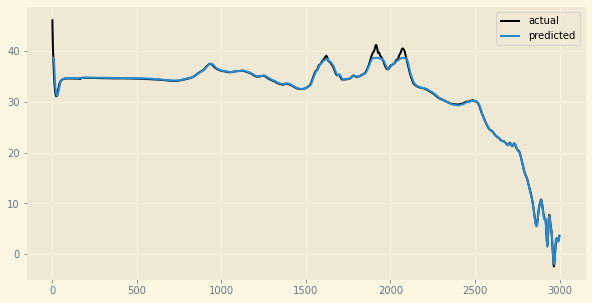

In [19]:
plt.figure(figsize=(10,5))
plt.plot(y_train,'k',label='actual')
plt.plot(train,label='predicted')
plt.legend()

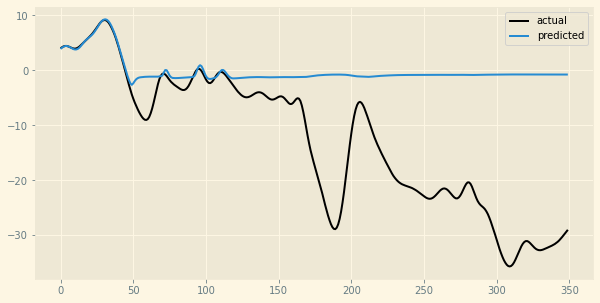

In [20]:
plt.figure(figsize=(10,5))
plt.plot(y_val,'k',label='actual')
plt.plot(val,label='predicted')
plt.legend()

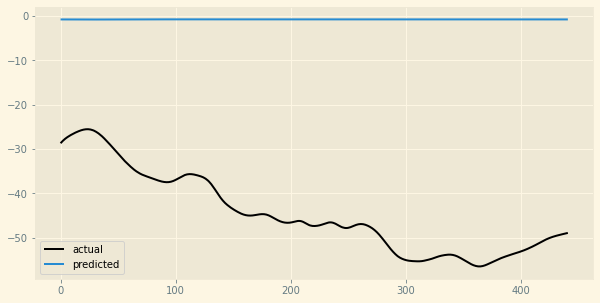

In [21]:
plt.figure(figsize=(10,5))
plt.plot(y_test,'k',label='actual')
plt.plot(test,label='predicted')
plt.legend()

It is interesting to note that the model fails to predict negative values of _u_. This could be due to the fact that much of the training set has positive values of _u_ and the activation function. There are two ways to solve this issue. The first one is to increase the training set size to account for negative values also. But that is not a viable option as the dataset itself is for a short window. The other option is to apply a relevant scaling to keep all values positive. 

### Scaled velocity

In [22]:
# min-max scaling
df['U_scaled']=(df.u-df.u.min())/(df.u.max()-df.u.min())
ws=10
inU,outU = df_to_x_y(df['U_scaled'],ws)

In [23]:
u_train,y_train = inU[:3000],outU[:3000]
u_val,y_val = inU[3000:3350],outU[3000:3350]
u_test,y_test = inU[3350:],outU[3350:]

In [24]:
model.fit(u_train, y_train, validation_data=(u_val, y_val), epochs=50, callbacks=[cp])

Epoch 1/50
89/94 [===========================>..] - ETA: 0s - loss: 6.3638e-04 - root_mean_squared_error: 0.0252

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 39ms/step - loss: 6.0417e-04 - root_mean_squared_error: 0.0246 - val_loss: 1.8746e-05 - val_root_mean_squared_error: 0.0043
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 9.2856e-07 - root_mean_squared_error: 9.6362e-04 - val_loss: 2.0420e-05 - val_root_mean_squared_error: 0.0045
Epoch 3/50
94/94 [==============================] - 0s 5ms/step - loss: 8.9402e-07 - root_mean_squared_error: 9.4552e-04 - val_loss: 2.1268e-05 - val_root_mean_squared_error: 0.0046
Epoch 4/50
94/94 [==============================] - 0s 4ms/step - loss: 8.6167e-07 - root_mean_squared_error: 9.2826e-04 - val_loss: 2.2242e-05 - val_root_mean_squared_error: 0.0047
Epoch 5/50
94/94 [==============================] - 0s 4ms/step - loss: 8.3485e-07 - root_mean_squared_error: 9.1370e-04 - val_loss: 2.2967e-05 - val_root_mean_squared_error: 0.0048
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 8.3108e-07 - root_mean_squared_e

Epoch 46/50
94/94 [==============================] - 0s 4ms/step - loss: 7.7720e-07 - root_mean_squared_error: 8.8159e-04 - val_loss: 3.5578e-05 - val_root_mean_squared_error: 0.0060
Epoch 47/50
94/94 [==============================] - 0s 4ms/step - loss: 7.8563e-07 - root_mean_squared_error: 8.8636e-04 - val_loss: 3.4609e-05 - val_root_mean_squared_error: 0.0059
Epoch 48/50
94/94 [==============================] - 1s 6ms/step - loss: 8.3216e-07 - root_mean_squared_error: 9.1223e-04 - val_loss: 3.8933e-05 - val_root_mean_squared_error: 0.0062
Epoch 49/50
94/94 [==============================] - 0s 4ms/step - loss: 8.1601e-07 - root_mean_squared_error: 9.0333e-04 - val_loss: 3.9475e-05 - val_root_mean_squared_error: 0.0063
Epoch 50/50
94/94 [==============================] - 0s 5ms/step - loss: 7.9088e-07 - root_mean_squared_error: 8.8931e-04 - val_loss: 4.4105e-05 - val_root_mean_squared_error: 0.0066


In [25]:
final_model = load_model('model1/')
train=final_model.predict(u_train)
val=final_model.predict(u_val)
test=final_model.predict(u_test)

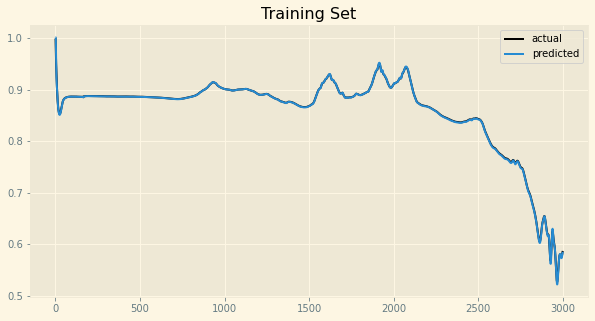

In [26]:
plt.figure(figsize=(10,5))
plt.plot(y_train,'k',label='actual')
plt.plot(train,label='predicted')
plt.title('Training Set')
plt.legend()

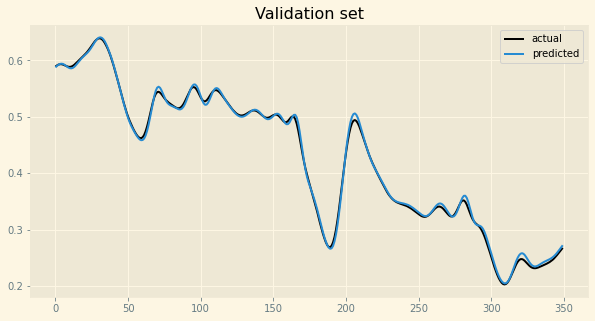

In [27]:
plt.figure(figsize=(10,5))
plt.plot(y_val,'k',label='actual')
plt.plot(val,label='predicted')
plt.title('Validation set')
plt.legend()

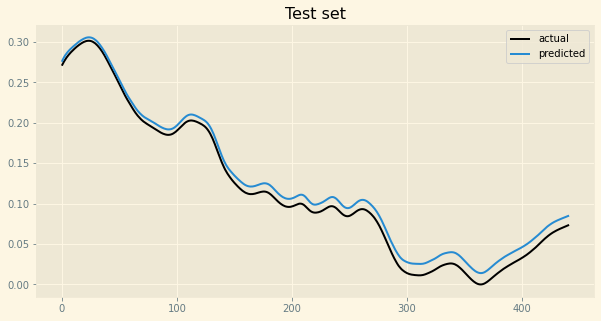

In [28]:
plt.figure(figsize=(10,5))
plt.plot(y_test,'k',label='actual')
plt.plot(test,label='predicted')
plt.title('Test set')
plt.legend()

## Multivariate

In [102]:
def df_to_xn_y(df,window_size=10):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        inpt = [var for var in df_as_np[i:i+window_size]]
        X.append(inpt)
        outpt = [df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2], df_as_np[i+window_size][3]]
        y.append(outpt)
    return np.array(X),np.array(y)

In [103]:
tdf=df[['u','v','w','p']]
tdf.u=(tdf.u-tdf.u.min())/(tdf.u.max()-tdf.u.min())
tdf.v=(tdf.v-tdf.v.min())/(tdf.v.max()-tdf.v.min())
tdf.w=(tdf.w-tdf.w.min())/(tdf.w.max()-tdf.w.min())
tdf.p=(tdf.p-tdf.p.min())/(tdf.p.max()-tdf.p.min())
var_in, var_out = df_to_xn_y(tdf)
var_in.shape, var_out.shape

((3792, 10, 4), (3792, 4))

In [44]:
np.max(var_out),np.min(var_out)

(1.0, 0.0)

In [104]:
in_train,out_train = var_in[:3000], var_out[:3000]
in_val,out_val = var_in[3000:3350], var_out[3000:3350]
in_test,out_test = var_in[3350:], var_out[3350:]
in_train.shape,out_train.shape

((3000, 10, 4), (3000, 4))

In [108]:
mvmodel = Sequential()
mvmodel.add(InputLayer((ws,4)))
mvmodel.add(LSTM(64))
mvmodel.add(Dense(16,'relu'))
mvmodel.add(Dense(4,'linear'))

mvmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                17664     
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                                 
 dense_9 (Dense)             (None, 4)                 68        
                                                                 
Total params: 18,772
Trainable params: 18,772
Non-trainable params: 0
_________________________________________________________________


In [109]:
cp = ModelCheckpoint('model2/',save_best_only=True)
mvmodel.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [123]:
mvmodel.fit(in_train, out_train, validation_data=(in_val, out_val), epochs=50, callbacks=[cp])

Epoch 1/50
82/94 [=========================>....] - ETA: 0s - loss: 3.9344e-04 - root_mean_squared_error: 0.0198

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 45ms/step - loss: 4.0173e-04 - root_mean_squared_error: 0.0200 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0905
Epoch 2/50
83/94 [=========================>....] - ETA: 0s - loss: 4.0151e-04 - root_mean_squared_error: 0.0200

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 32ms/step - loss: 3.9945e-04 - root_mean_squared_error: 0.0200 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0901
Epoch 3/50
90/94 [===========================>..] - ETA: 0s - loss: 4.0329e-04 - root_mean_squared_error: 0.0201

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 36ms/step - loss: 3.9213e-04 - root_mean_squared_error: 0.0198 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0893
Epoch 4/50
87/94 [==========================>...] - ETA: 0s - loss: 3.9323e-04 - root_mean_squared_error: 0.0198

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 3.8774e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0886
Epoch 5/50
85/94 [==========================>...] - ETA: 0s - loss: 3.9368e-04 - root_mean_squared_error: 0.0198

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 3.7810e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0879
Epoch 6/50
83/94 [=========================>....] - ETA: 0s - loss: 3.5062e-04 - root_mean_squared_error: 0.0187

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 37ms/step - loss: 3.7844e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0872
Epoch 7/50
90/94 [===========================>..] - ETA: 0s - loss: 3.6993e-04 - root_mean_squared_error: 0.0192

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 3.7121e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0865
Epoch 8/50
94/94 [==============================] - ETA: 0s - loss: 3.7150e-04 - root_mean_squared_error: 0.0193

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 40ms/step - loss: 3.7150e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0863
Epoch 9/50
88/94 [===========================>..] - ETA: 0s - loss: 3.5647e-04 - root_mean_squared_error: 0.0189

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 32ms/step - loss: 3.6150e-04 - root_mean_squared_error: 0.0190 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0858
Epoch 10/50
89/94 [===========================>..] - ETA: 0s - loss: 3.6904e-04 - root_mean_squared_error: 0.0192

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 3.6403e-04 - root_mean_squared_error: 0.0191 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853
Epoch 11/50
87/94 [==========================>...] - ETA: 0s - loss: 3.6274e-04 - root_mean_squared_error: 0.0190

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 3.5567e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0848
Epoch 12/50
85/94 [==========================>...] - ETA: 0s - loss: 3.6925e-04 - root_mean_squared_error: 0.0192

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 3.5454e-04 - root_mean_squared_error: 0.0188 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0844
Epoch 13/50
89/94 [===========================>..] - ETA: 0s - loss: 3.5708e-04 - root_mean_squared_error: 0.0189

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 38ms/step - loss: 3.4679e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0839
Epoch 14/50
90/94 [===========================>..] - ETA: 0s - loss: 3.3625e-04 - root_mean_squared_error: 0.0183

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 30ms/step - loss: 3.4994e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0837
Epoch 15/50
89/94 [===========================>..] - ETA: 0s - loss: 3.2787e-04 - root_mean_squared_error: 0.0181

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 3.4976e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0832
Epoch 16/50
89/94 [===========================>..] - ETA: 0s - loss: 3.5625e-04 - root_mean_squared_error: 0.0189

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 3.5155e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0827
Epoch 17/50
90/94 [===========================>..] - ETA: 0s - loss: 3.4838e-04 - root_mean_squared_error: 0.0187

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 3.3874e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0822
Epoch 18/50
86/94 [==========================>...] - ETA: 0s - loss: 3.5017e-04 - root_mean_squared_error: 0.0187

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 33ms/step - loss: 3.3488e-04 - root_mean_squared_error: 0.0183 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0818
Epoch 19/50
86/94 [==========================>...] - ETA: 0s - loss: 3.2439e-04 - root_mean_squared_error: 0.0180

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 32ms/step - loss: 3.3219e-04 - root_mean_squared_error: 0.0182 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0815
Epoch 20/50
86/94 [==========================>...] - ETA: 0s - loss: 3.2638e-04 - root_mean_squared_error: 0.0181

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 38ms/step - loss: 3.2675e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0812
Epoch 21/50
84/94 [=========================>....] - ETA: 0s - loss: 3.2604e-04 - root_mean_squared_error: 0.0181

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 32ms/step - loss: 3.2985e-04 - root_mean_squared_error: 0.0182 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0807
Epoch 22/50
88/94 [===========================>..] - ETA: 0s - loss: 3.3289e-04 - root_mean_squared_error: 0.0182

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 37ms/step - loss: 3.2488e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0805
Epoch 23/50
82/94 [=========================>....] - ETA: 0s - loss: 3.2979e-04 - root_mean_squared_error: 0.0182

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 33ms/step - loss: 3.2206e-04 - root_mean_squared_error: 0.0179 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0803
Epoch 24/50
90/94 [===========================>..] - ETA: 0s - loss: 2.8466e-04 - root_mean_squared_error: 0.0169

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 3.1894e-04 - root_mean_squared_error: 0.0179 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0797
Epoch 25/50
94/94 [==============================] - ETA: 0s - loss: 3.1897e-04 - root_mean_squared_error: 0.0179

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 39ms/step - loss: 3.1897e-04 - root_mean_squared_error: 0.0179 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0792
Epoch 26/50
87/94 [==========================>...] - ETA: 0s - loss: 3.2017e-04 - root_mean_squared_error: 0.0179

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 32ms/step - loss: 3.1469e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0789
Epoch 27/50
84/94 [=========================>....] - ETA: 0s - loss: 3.2304e-04 - root_mean_squared_error: 0.0180

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 37ms/step - loss: 3.0967e-04 - root_mean_squared_error: 0.0176 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0784
Epoch 28/50
83/94 [=========================>....] - ETA: 0s - loss: 3.1533e-04 - root_mean_squared_error: 0.0178

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 3.0458e-04 - root_mean_squared_error: 0.0175 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0780
Epoch 29/50
92/94 [============================>.] - ETA: 0s - loss: 3.1166e-04 - root_mean_squared_error: 0.0177

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 46ms/step - loss: 3.0700e-04 - root_mean_squared_error: 0.0175 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0775
Epoch 30/50
86/94 [==========================>...] - ETA: 0s - loss: 3.1631e-04 - root_mean_squared_error: 0.0178

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 42ms/step - loss: 3.0302e-04 - root_mean_squared_error: 0.0174 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0771
Epoch 31/50
85/94 [==========================>...] - ETA: 0s - loss: 3.0676e-04 - root_mean_squared_error: 0.0175

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 38ms/step - loss: 2.9543e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0769
Epoch 32/50
81/94 [========================>.....] - ETA: 0s - loss: 2.8638e-04 - root_mean_squared_error: 0.0169

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 42ms/step - loss: 2.9720e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0767
Epoch 33/50
87/94 [==========================>...] - ETA: 0s - loss: 3.0406e-04 - root_mean_squared_error: 0.0174

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 33ms/step - loss: 2.9627e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0764
Epoch 34/50
90/94 [===========================>..] - ETA: 0s - loss: 2.9505e-04 - root_mean_squared_error: 0.0172

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 41ms/step - loss: 2.9173e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
Epoch 35/50
84/94 [=========================>....] - ETA: 0s - loss: 2.5937e-04 - root_mean_squared_error: 0.0161

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 38ms/step - loss: 2.8344e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0753
Epoch 36/50
86/94 [==========================>...] - ETA: 0s - loss: 2.5131e-04 - root_mean_squared_error: 0.0159

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 41ms/step - loss: 2.7984e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 37/50
86/94 [==========================>...] - ETA: 0s - loss: 2.7906e-04 - root_mean_squared_error: 0.0167

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 32ms/step - loss: 2.7771e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0745
Epoch 38/50
89/94 [===========================>..] - ETA: 0s - loss: 2.8347e-04 - root_mean_squared_error: 0.0168

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 36ms/step - loss: 2.7671e-04 - root_mean_squared_error: 0.0166 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0739
Epoch 39/50
85/94 [==========================>...] - ETA: 0s - loss: 2.8676e-04 - root_mean_squared_error: 0.0169

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 41ms/step - loss: 2.7344e-04 - root_mean_squared_error: 0.0165 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0738
Epoch 40/50
83/94 [=========================>....] - ETA: 0s - loss: 2.8903e-04 - root_mean_squared_error: 0.0170

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 39ms/step - loss: 2.6987e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0732
Epoch 41/50
93/94 [============================>.] - ETA: 0s - loss: 2.6739e-04 - root_mean_squared_error: 0.0164

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 45ms/step - loss: 2.6627e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0728
Epoch 42/50
85/94 [==========================>...] - ETA: 0s - loss: 2.9117e-04 - root_mean_squared_error: 0.0171

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 2.8213e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 43/50
88/94 [===========================>..] - ETA: 0s - loss: 2.7110e-04 - root_mean_squared_error: 0.0165

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 45ms/step - loss: 2.6015e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0720
Epoch 44/50
92/94 [============================>.] - ETA: 0s - loss: 2.2006e-04 - root_mean_squared_error: 0.0148

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 2.5370e-04 - root_mean_squared_error: 0.0159 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 45/50
94/94 [==============================] - ETA: 0s - loss: 2.5433e-04 - root_mean_squared_error: 0.0159

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 36ms/step - loss: 2.5433e-04 - root_mean_squared_error: 0.0159 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0710
Epoch 46/50
82/94 [=========================>....] - ETA: 0s - loss: 2.6250e-04 - root_mean_squared_error: 0.0162

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 42ms/step - loss: 2.4906e-04 - root_mean_squared_error: 0.0158 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0707
Epoch 47/50
94/94 [==============================] - ETA: 0s - loss: 2.5447e-04 - root_mean_squared_error: 0.0160

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 2.5447e-04 - root_mean_squared_error: 0.0160 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0704
Epoch 48/50
84/94 [=========================>....] - ETA: 0s - loss: 2.0822e-04 - root_mean_squared_error: 0.0144

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 39ms/step - loss: 2.4590e-04 - root_mean_squared_error: 0.0157 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 49/50
84/94 [=========================>....] - ETA: 0s - loss: 2.0637e-04 - root_mean_squared_error: 0.0144

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 2.4621e-04 - root_mean_squared_error: 0.0157 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0696
Epoch 50/50
84/94 [=========================>....] - ETA: 0s - loss: 2.2597e-04 - root_mean_squared_error: 0.0150

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 2.3757e-04 - root_mean_squared_error: 0.0154 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0693


In [124]:
final_mvmodel = load_model('model2/')

In [118]:
from sklearn.metrics import mean_squared_error
def plot_predictions(model,x,y,set_label,sublabels):
    predictions = model.predict(x)
    rms=np.sqrt(mean_squared_error(y,predictions,multioutput='raw_values'))
    nsteps=y.shape[0]
    nvars=y.shape[1]
    ncols=1+(nvars>1)
    nrows=1+int((nvars-1)/2)
    
    fig,axs = plt.subplots(nrows,ncols,figsize=(ncols*8,nrows*5))
    
    if nrows<=1:
        for var in range(nvars):
            axs[var].plot(y[:,var],'k',label='actual')
            axs[var].plot(predictions[:,var],'r',label='predicted')
            axs[var].set_title(sublabels[var])
            axs[var].legend()
            print("RMS error in %s prediction for %s : %4.3f" %(sublabels[var],set_label,rms[var]))
    
    else:
        var = 0
        for row in range(nrows):
            for col in range(ncols):
                axs[row][col].plot(y[:,var],'k',label='actual')
                axs[row][col].plot(predictions[:,var],'r',label='predicted')
                axs[row][col].set_title(sublabels[var])
                axs[row][col].legend()
                print("RMS error in %s prediction for %s : %4.3f" %(sublabels[var],set_label,rms[var]))
                var+=1
    
    plt.suptitle(set_label)

RMS error in u prediction for Training set : 0.006
RMS error in v prediction for Training set : 0.021
RMS error in w prediction for Training set : 0.007
RMS error in p prediction for Training set : 0.021


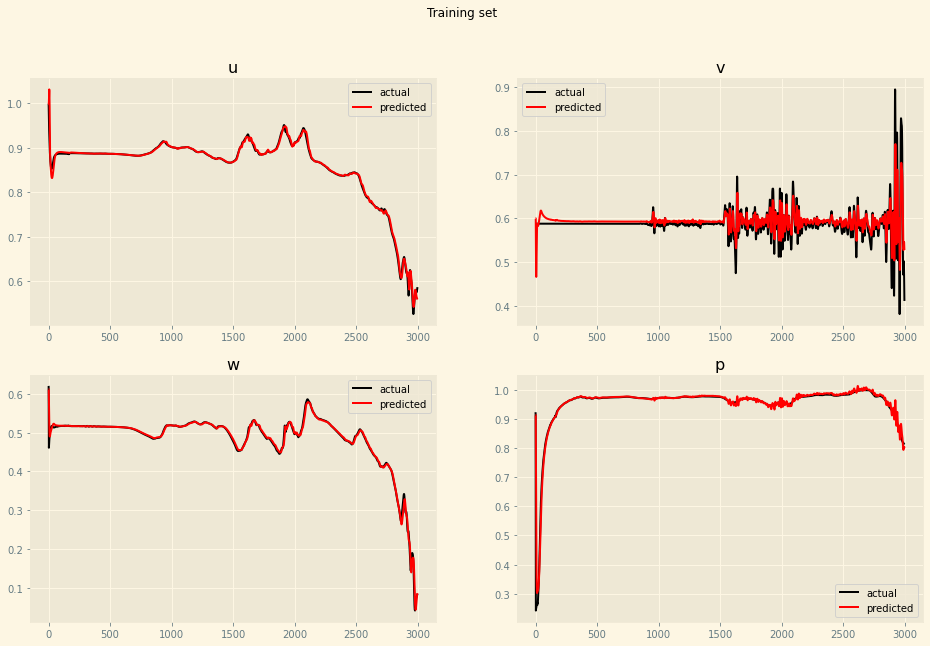

In [125]:
plot_predictions(final_mvmodel,in_train,out_train,'Training set',['u','v','w','p'])

RMS error in u prediction for Validation set : 0.041
RMS error in v prediction for Validation set : 0.120
RMS error in w prediction for Validation set : 0.041
RMS error in p prediction for Validation set : 0.038


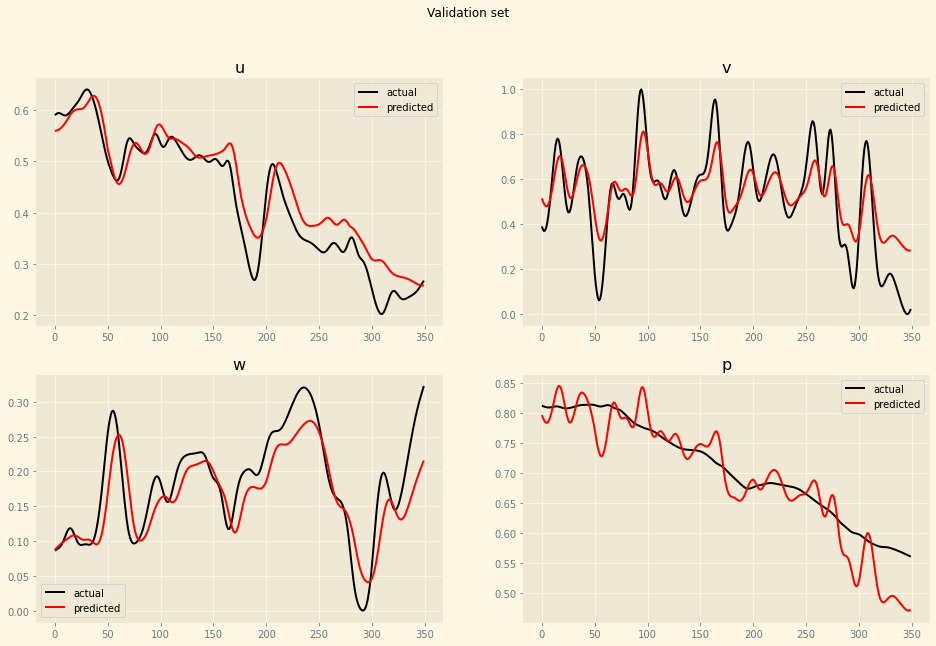

In [126]:
plot_predictions(final_mvmodel,in_val,out_val,'Validation set',['u','v','w','p'])

RMS error in u prediction for Test set : 0.212
RMS error in v prediction for Test set : 0.147
RMS error in w prediction for Test set : 0.404
RMS error in p prediction for Test set : 0.061


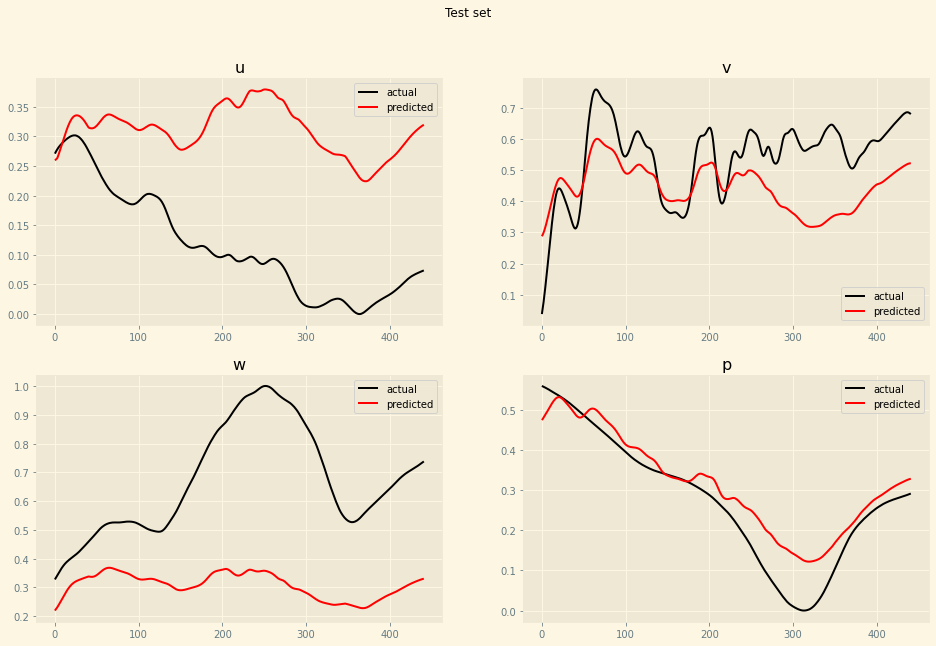

In [127]:
plot_predictions(final_mvmodel,in_test,out_test,'Test set',['u','v','w','p'])